In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = 0
T = 3
tau = 0.0001
dt = 1/365

n_steps = int(T / dt)
# Initialize the array for the simulated process
X = np.zeros((n_steps + 1, paths))


    # Generate random numbers for the simulation
rand = np.random.normal(0, 1, (n_steps, paths))

    # Simulate the paths
for t in range(1, n_steps + 1):
    X[t] = X[t - 1] + theta * (mu - X[t - 1]) * dt + sigma * np.sqrt(dt) * rand[t - 1]



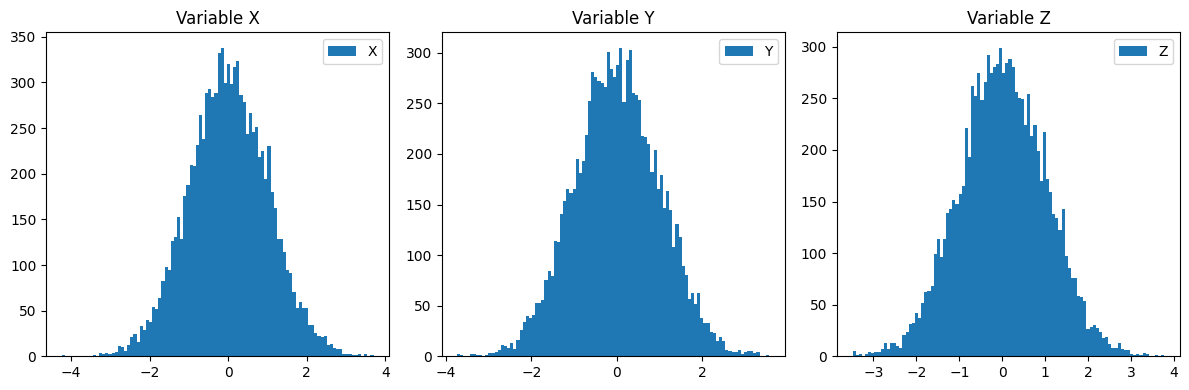

In [ ]:


# Number of samples
n_samples = 10000

# Define the desired correlation matrix
# It should be positive semi-definite for the Cholesky decomposition to work
# For example, let's assume we want the following correlation matrix:
#       [ 1   0.8  0.8 ]
#       [ 0.8 1    0.8 ]
#       [ 0.8 0.8  1   ]
correlation_matrix = np.array([
    [1.0, 0.8, 0.8],
    [0.8, 1.0, 0.8],
    [0.8, 0.8, 1.0]
])

# Perform the Cholesky decomposition
cholesky_decomp = np.linalg.cholesky(correlation_matrix)

# Generate independent random samples
independent_samples = np.random.randn(n_samples, 3)

# Apply the Cholesky decomposition to get correlated samples
correlated_samples = independent_samples.dot(cholesky_decomp.T)

# Plotting the correlated variables
plt.figure(figsize=(12, 4))

# Variable X
plt.subplot(1, 3, 1)
plt.hist(correlated_samples[:, 0], bins = 100,label='X')
plt.title('Variable X')
plt.legend()

# Variable Y
plt.subplot(1, 3, 2)
plt.hist(correlated_samples[:, 1], bins = 100, label='Y')
plt.title('Variable Y')
plt.legend()

# Variable Z
plt.subplot(1, 3, 3)
plt.hist(correlated_samples[:, 2], bins = 100, label='Z')
plt.title('Variable Z')
plt.legend()

plt.tight_layout()
plt.show()

## Check correlations

In [ ]:
np.corrcoef(correlated_samples.T) 

array([[1.        , 0.80319479, 0.80038641],
       [0.80319479, 1.        , 0.80090467],
       [0.80038641, 0.80090467, 1.        ]])

## Using Halton sequences

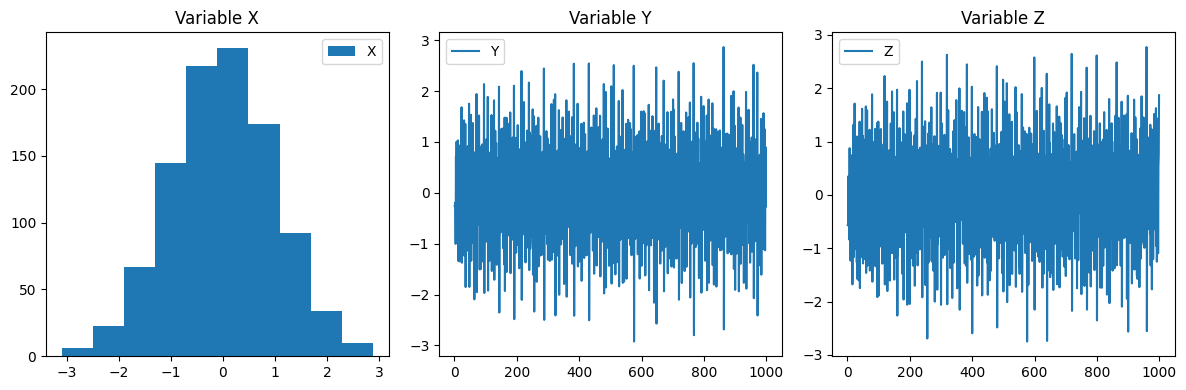

c:\git\curves\.venv\Lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc, norm

# Number of dimensions and samples
n_dim = 3
n_samples = 1000

# Create a Halton sampler
sampler = qmc.Halton(d=n_dim, scramble=False)

# Generate the Halton sequence
halton_samples = sampler.random(n=n_samples)

# Transform the Halton sequence samples into a standard normal distribution
standard_normal_samples = norm.ppf(halton_samples)

# Define the desired correlation matrix for the random variables
correlation_matrix = np.array([
    [1.0, 0.8, 0.8],
    [0.8, 1.0, 0.8],
    [0.8, 0.8, 1.0]
])

# Perform the Cholesky decomposition to get the lower triangular matrix L
cholesky_decomp = np.linalg.cholesky(correlation_matrix)

# Apply the Cholesky decomposition to get correlated standard normal samples
correlated_samples = standard_normal_samples.dot(cholesky_decomp.T)

# Plotting the correlated variables
plt.figure(figsize=(12, 4))

# Variable X
plt.subplot(1, 3, 1)
plt.hist(correlated_samples[:, 0], label='X')
plt.title('Variable X')
plt.legend()

# Variable Y
plt.subplot(1, 3, 2)
plt.plot(correlated_samples[:, 1], label='Y')
plt.title('Variable Y')
plt.legend()

# Variable Z
plt.subplot(1, 3, 3)
plt.plot(correlated_samples[:, 2], label='Z')
plt.title('Variable Z')
plt.legend()

plt.tight_layout()
plt.show()
np.corrcoef(correlated_samples.T) 

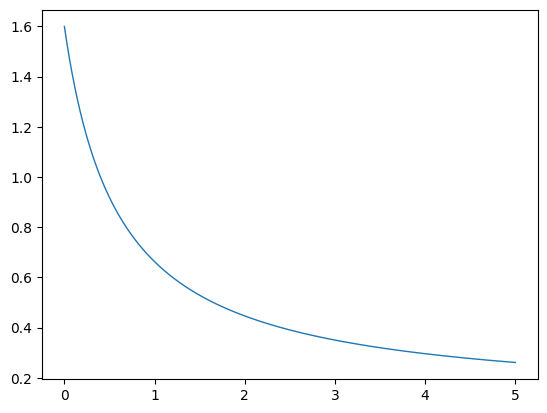

In [ ]:
# Parameters 
T = 5  # Total time of the simulation in years
F0 = term_structure(0)  # Initial forward price using the term structure
dt = 1/252  # Daily time step
paths = 1000  # Number of paths to simulate
n_steps = int(T / dt)

taus = np.arange(0, n_steps + 1) * dt  # Time steps

#plt.plot(taus, term_structure(taus, T), lw=1, label='Term Structure')
plt.plot(taus, vol_structure(taus, T), lw=1, label='Term Structure')

Int1 = 0
Int2 = 0
Int3 = 0

#F1 = F0 * np.exp(Int1 * rand1 - 0.5 * Int1**2) * np.exp(Int2 * rand2 - 0.5 * Int2**2) * np.exp(Int3 * rand3 - 0.5 * Int3**2)
